### Classification with CIFAR-10 Dataset and LeNet-5 network
This script sets up a LeNet-style network to classify digits from the CIFAR-10 dataset.

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Input, Conv2D, Dense, Flatten, MaxPooling2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import numpy as np
from utils import *

/usr/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = get_cifar10_data(vectorize=False)

Build the model.

In [3]:
model = Sequential()
model.add(Conv2D(50,5,padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(20,5,padding='valid',activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        3800      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 20)        25020     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total para

Set up the model to optimize the binary crossentropy loss using stochastic gradient descent.

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Optimize the model over the training data.

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=50,
                    verbose=1,
                    validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/50
9000/9000 [==============================] - 4s 450us/step - loss: 0.3930 - acc: 0.8161 - val_loss: 0.2815 - val_acc: 0.8890
Epoch 2/50
9000/9000 [==============================] - 1s 93us/step - loss: 0.2404 - acc: 0.9022 - val_loss: 0.2301 - val_acc: 0.9160
Epoch 3/50
9000/9000 [==============================] - 1s 91us/step - loss: 0.1867 - acc: 0.9291 - val_loss: 0.1771 - val_acc: 0.9350
Epoch 4/50
9000/9000 [==============================] - 1s 93us/step - loss: 0.1511 - acc: 0.9412 - val_loss: 0.1625 - val_acc: 0.9320
Epoch 5/50
9000/9000 [==============================] - 1s 96us/step - loss: 0.1250 - acc: 0.9522 - val_loss: 0.1605 - val_acc: 0.9370
Epoch 6/50
9000/9000 [==============================] - 1s 96us/step - loss: 0.1074 - acc: 0.9598 - val_loss: 0.1534 - val_acc: 0.9470
Epoch 7/50
9000/9000 [==============================] - 1s 96us/step - loss: 0.0885 - acc: 0.9664 - val_loss: 0.1666 - val_acc: 0.9450
Epoch 

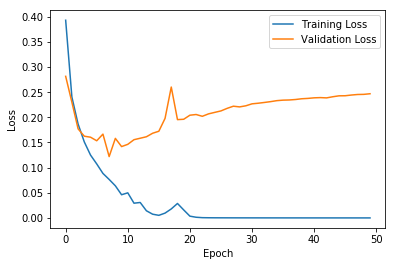

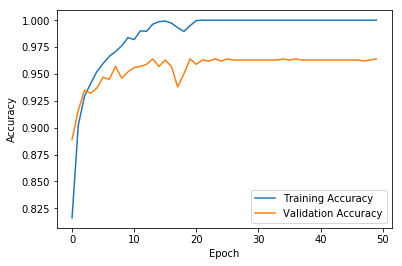

In [6]:
plot_history(history)

In [7]:
evaluate_test_accuracy(model,x_test,y_test)

2000/2000 [==============================] - 0s 70us/step
Test accuracy: 94.75%
